# 🏦 Loan Default Prediction - EDA and Data Processing

In this notebook, we'll perform explarotary data analysis to analyze and investigate data set and summarize it's main characteristics.

## Data Description:
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

# 📚 1. Import Libraries

In [103]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
# Display only 3 digits after floating point in pandas objects
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

import warnings
warnings.simplefilter(action="ignore", category=Warning)

# 📖 2. Load Data

## 2.1. Mounting Google Drive

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
%cd drive/My Drive/Colab Notebooks/Capstone-Project-Loan-Default-Prediction

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Capstone-Project-Loan-Default-Prediction'
/content/drive/My Drive/Colab Notebooks/Capstone-Project-Loan-Default-Prediction


In [106]:
# Set directorty paths as global variable
data_path = './Data/Raw/'

In [107]:
raw_data = pd.read_csv(data_path + 'hmeq.csv')
print(f'The dataset has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

The dataset has 5960 rows and 13 columns


In [108]:
# Creating a copy of the dataframe in case we need the raw data in the next sections
df = raw_data.copy()

## 2.2. Data Overview

In [109]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,NaN
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,2.000,121.833,0.000,14.000,NaN
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,NaN


In [110]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.000,90185.000,DebtCon,Other,16.000,0.000,0.000,221.809,0.000,16.000,36.112
5956,0,89000,54576.000,92937.000,DebtCon,Other,16.000,0.000,0.000,208.692,0.000,15.000,35.860
5957,0,89200,54045.000,92924.000,DebtCon,Other,15.000,0.000,0.000,212.280,0.000,15.000,35.557
5958,0,89800,50370.000,91861.000,DebtCon,Other,14.000,0.000,0.000,213.893,0.000,16.000,34.341
5959,0,89900,48811.000,88934.000,DebtCon,Other,15.000,0.000,0.000,219.601,0.000,16.000,34.572


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# ✅ 3. Sanity Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1. Checking for Missing Values

In [112]:
def check_missing_values(data):
  '''
    Prints the number of features with missing values and it's percentage
    in the dataset.

    ---
    ###Parameters
    data <dataframe>: tabular data in data frame format.
  '''
  count = df.isnull().sum()[df.isnull().sum() > 0]
  percentage = (count / df.shape[0]) * 100

  print(count.shape[0], 'columns has missing values')
  print('-'*50)
  print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))


In [113]:
check_missing_values(df)

11 columns has missing values
--------------------------------------------------
         Count  Percentage %
MORTDUE    518         8.691
VALUE      112         1.879
REASON     252         4.228
JOB        279         4.681
YOJ        515         8.641
DEROG      708        11.879
DELINQ     580         9.732
CLAGE      308         5.168
NINQ       510         8.557
CLNO       222         3.725
DEBTINC   1267        21.258


**🔎 Observations:**

- 21% of the values in DEBTINC column are null and this is the feature with the most number of null values.
- 11% of the values in DEROG column are null and this is the feature with the second most number of null values.
- We'll check in the univariate analysis section if these null values something that we can impute or not.
- BAD, which is the target variable, has no null values.

## 3.2. Checking for Duplicates

In [114]:
df.duplicated().sum()

0

**🔎 Observations:** The dataset has **no duplicated records**.

## 3.3. Checking for Data Type

In [115]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

**🔎 Observations:**
- BAD column is in `int64` however, it should be obejct as this is a classification problem and the column has the target values.
- We have 2 object columns which are REASON and JOB as expected from the data dictionary above.

## 3.4. Checking the number of unique values of each column

In [116]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

**🔎 Observations:** So there is no column with unique value to be dropped.

## 3.5. Summary Statistics

In [117]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.000,NaN,NaN,NaN,0.199,0.400,0.000,0.000,0.000,0.000,1.000
LOAN,5960.000,NaN,NaN,NaN,18607.970,11207.480,1100.000,11100.000,16300.000,23300.000,89900.000
MORTDUE,5442.000,NaN,NaN,NaN,73760.817,44457.609,2063.000,46276.000,65019.000,91488.000,399550.000
VALUE,5848.000,NaN,NaN,NaN,101776.049,57385.775,8000.000,66075.500,89235.500,119824.250,855909.000
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.000,NaN,NaN,NaN,8.922,7.574,0.000,3.000,7.000,13.000,41.000
DEROG,5252.000,NaN,NaN,NaN,0.255,0.846,0.000,0.000,0.000,0.000,10.000
DELINQ,5380.000,NaN,NaN,NaN,0.449,1.127,0.000,0.000,0.000,0.000,15.000
CLAGE,5652.000,NaN,NaN,NaN,179.766,85.810,0.000,115.117,173.467,231.562,1168.234


**🔎 Observations:**

- The maximum amount of LOAN in the dataset is 89,900 and the minimum is 1,100 with a mean of 18,609.
- Records for the amount due on the existing mortgage (MORTDUE) has maximum of 399,550 and minimum of 2,063 with mean of 73,761.

# 📊 4. Exploratory Data Analysis (EDA) and Visualization

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

## 4.1. Univariate Analysis

In [118]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 2 ['REASON', 'JOB']
Numeric columns: 11 ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


### 4.1.1. Numeric Columns

In [119]:
# A function to display the both the histogram and the boxplot of a numeric column
def dist_plot(data, feature):
  '''
        This function takes the name of the feature and
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn.
        The purpose is to check if the numeric feature has
        normal distribution and detect outliers manualy.
        Skewness and kurtosis values of the data are also
        shown.

        ---
        ### Parameters
        - data <dataframe>: tabular data in data frame format.
        - feature <string>: Name of numeric column in dataframe to be visualized.
  '''

  # Create the canvas with 2 sub-plots in rows with 0.15 to 0.85 ratio
  fig, (ax_box, ax_hist) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw = {'height_ratios':(0.15, 0.84)},
      figsize = (12, 6)
  )

  # Add the boxblot to the canvas in the first row
  sb.boxplot(
      data = data,
      x = feature,
      color = 'lightblue',
      showmeans = True,
      ax = ax_box
  )
  ax_box.set_xlabel('') # Remove the label from the x axis of the boxplot

  # Add the histogram to the canvas in the second row
  sb.histplot(
      data = data,
      x = feature,
      kde = True,
      color='green',
      ax = ax_hist
  )
  ax_hist.set_xlabel('') # Remove the label from the x axis of the histogram
  # Add grid
  ax_hist.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)


  # Calculate the skewness and kurtosis
  skewness = data[feature].skew()
  kurt = data[feature].kurt()
  # Add skewness and kurtosis as text on the histogram plot
  ax_hist.text(
      0.95, 0.85,
      f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
      transform = ax_hist.transAxes,
      verticalalignment = 'top',
      horizontalalignment = 'right',
      bbox = dict(facecolor='white', edgecolor='gray', boxstyle='round, pad=0.5')
  )

  # Calculcate mean and median values of the feature
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add these values as a vertical line to the histogram
  ax_hist.axvline(mean_value, color='blue', linestyle='dotted', linewidth=2, label='Mean')
  ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')

  # Add legends
  ax_hist.legend(loc='lower right')

  plt.suptitle(feature)
  plt.tight_layout()
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()

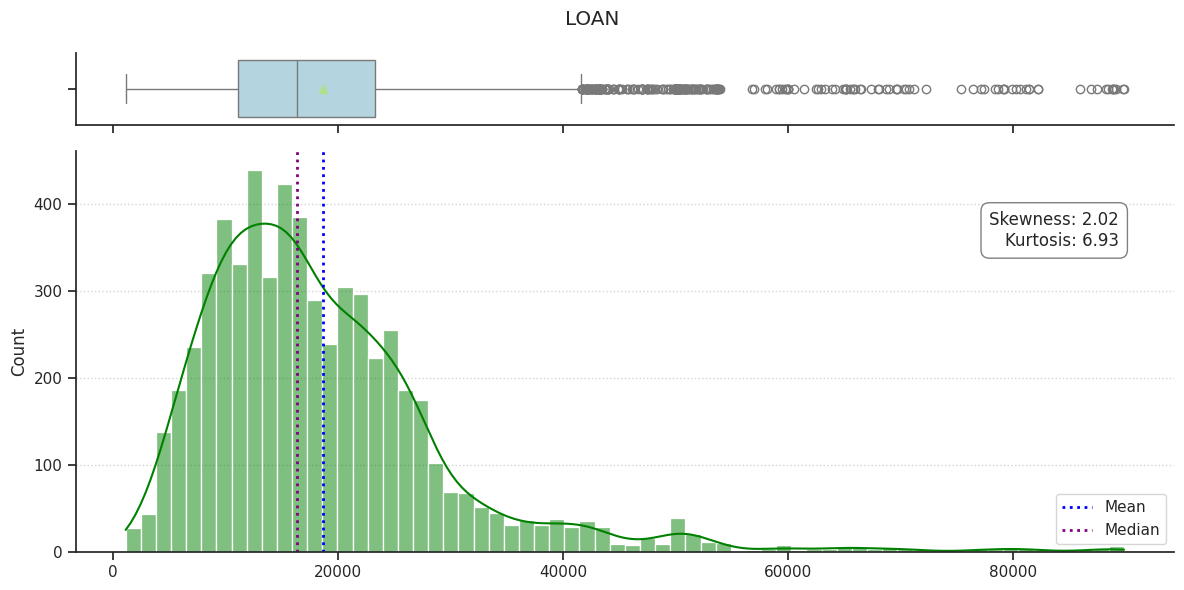

In [120]:
dist_plot(df, 'LOAN')

🔎 **Observations:** LOAN has a left-skewed distribution which make sense when you consider that having large amount loans are not easy as it requires a lot conditions to be filled. Majority of the applications fall into the range of 1100 till 4000. However, there are a few applications which take place after 4000 untill almost 90000.

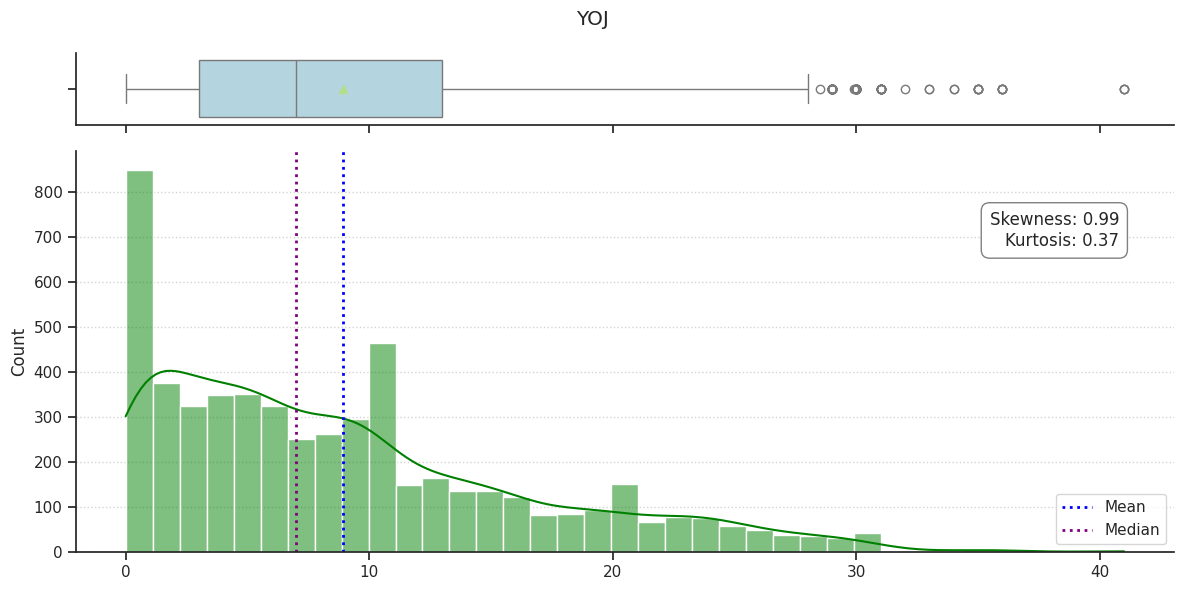

In [121]:
dist_plot(df, 'YOJ')

🔎 **Observations:** Years at present job (YOJ) feature also has left-skewed distribution with mean value of 9 years. You can see that the majority of the applicants have around 1 year of experience. In many countries, it's a cultural thing to buy a property right after having a 1-year of eployement. The distribution of this feature looks like bimodal as it has also spike on the people with more than 10 years of experience.

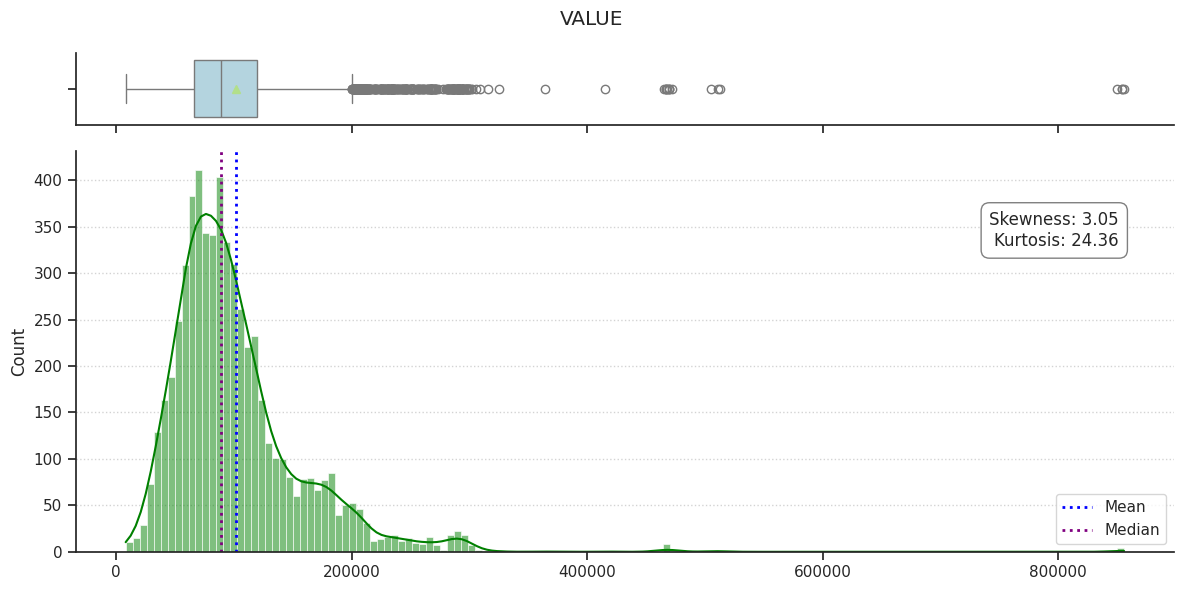

In [122]:
dist_plot(df, 'VALUE')

🔎 **Observations:** Even though the range of the data is different for LOAN and VALUE, it's easy to notice that the distribution of these 2 features are similar as expected. Considering that almost 2% of the records for the VALUE column are missing, it ranges from 8000 to 855909 with a mean value of 101776.

✍🏼 **Note:** Derogatory marks are negative, long-lasting indications on your credit reports that generally mean you didn't pay back a loan as agreed. For example, a late payment or bankruptcy appears on your reports as a derogatory mark.

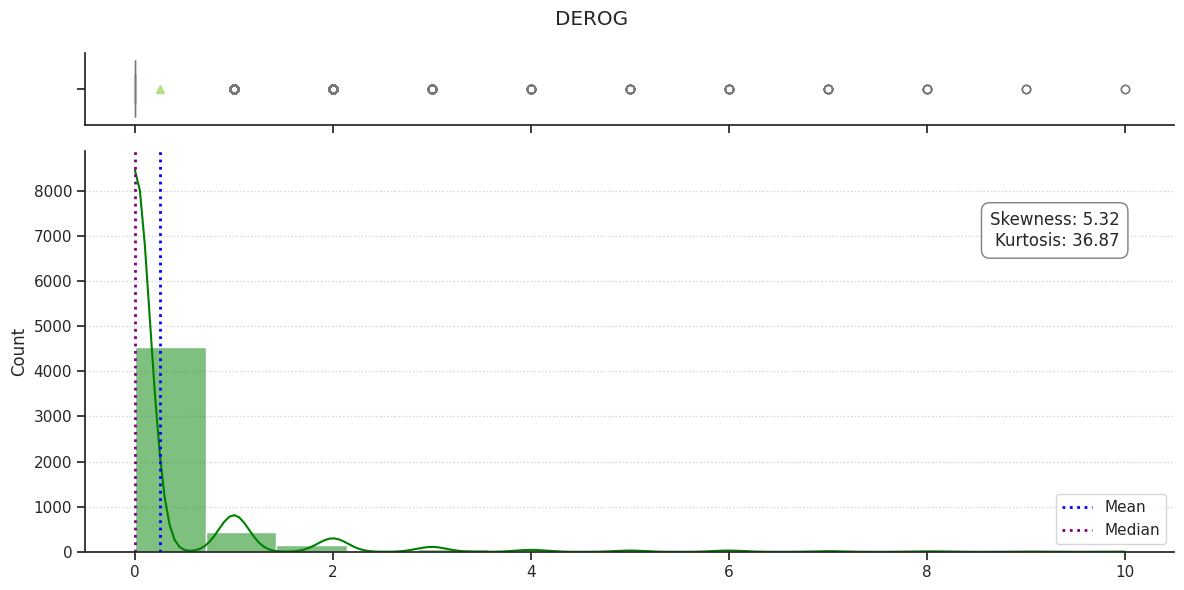

In [123]:
dist_plot(df, 'DEROG')

In [124]:
df['DEROG'].value_counts()

DEROG
0.000     4527
1.000      435
2.000      160
3.000       58
4.000       23
5.000       15
6.000       15
7.000        8
8.000        6
9.000        3
10.000       2
Name: count, dtype: int64

🔎 **Observations:** It seems like this data should be treated as categorical. Most of the applicants has no derogatory item on their credit report. It might be a good indicator to predict if a loan will be default or not. It's worth to check in the bivariate analysis section. We should keep in mind that almost 12% of this data is missing.

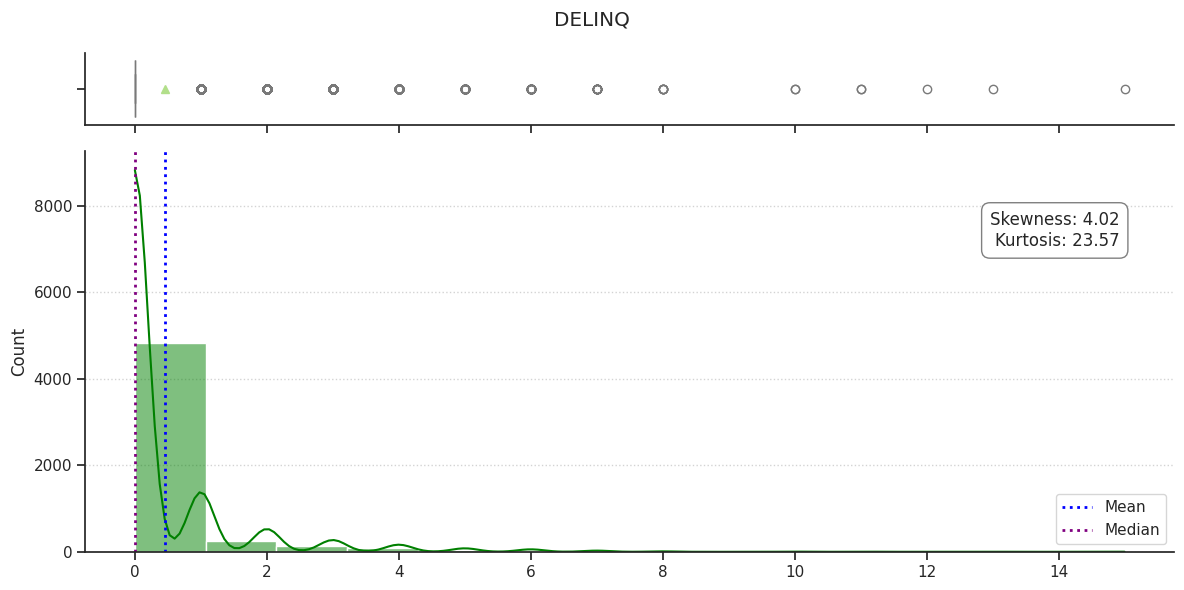

In [125]:
dist_plot(df, 'DELINQ')

In [126]:
df['DELINQ'].value_counts()

DELINQ
0.000     4179
1.000      654
2.000      250
3.000      129
4.000       78
5.000       38
6.000       27
7.000       13
8.000        5
10.000       2
11.000       2
15.000       1
12.000       1
13.000       1
Name: count, dtype: int64

🔎 **Observations:** Most of the applicants have no delinquency line on their credit report. Just like DEROG, t might be a good indicator to predict if a loan will be default or not. It's worth to check in the bivariate analysis section. Almost 10% of the data is missing. This one also, can be considered as categorical column.

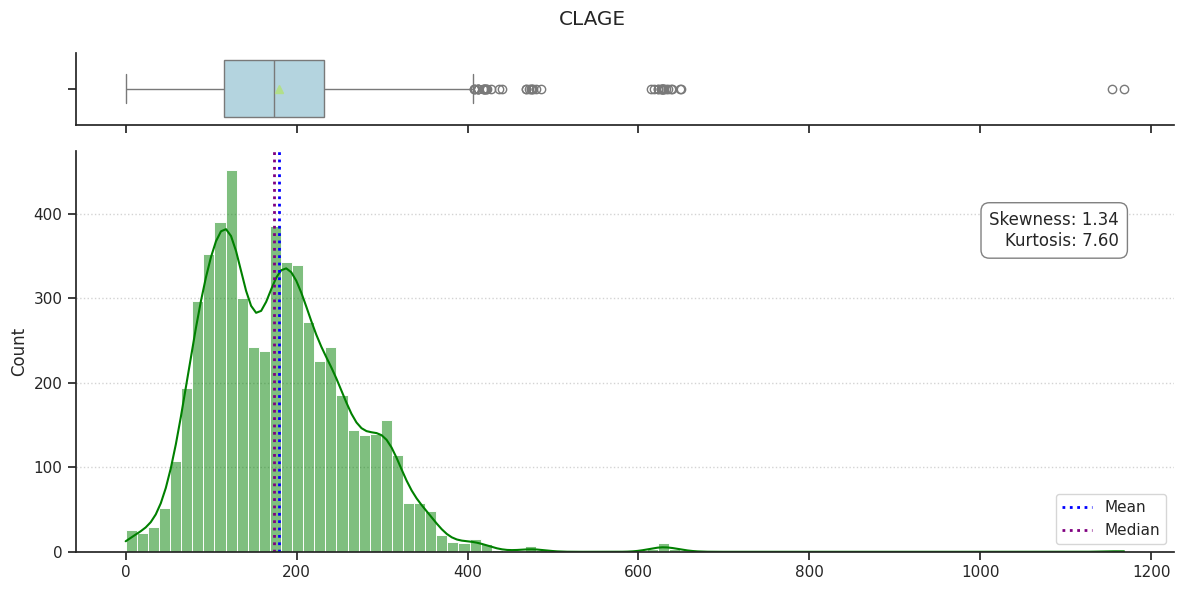

In [127]:
dist_plot(df, 'CLAGE')

🔎 **Observations:** The variable "CLAGE" represents the age of the oldest credit line in months. For instance, if a person opened their first credit line, such as a credit card or loan, in January 2010, and the current date is June 2023, the "CLAGE" for this individual would be approximately 161 months (June 2023 - January 2010). It measures the duration since the initiation of the oldest credit line and provides a timeframe in months, indicating how long the individual has been using credit. Age of the oldest credit line in months in our dataset is 1168 (97 years and 4 months) with the mean value of 180 (15 years). It looks like the data has left-skewed bimodel distribution.

In [128]:
df[df['CLAGE'] >= 600]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800,87300.000,155500.000,DebtCon,Other,3.000,0.000,0.000,1154.633,0.000,0.000,NaN
3679,1,19300,96454.000,157809.000,DebtCon,Other,3.000,0.000,0.000,1168.234,0.000,0.000,40.206
3787,0,20000,56135.000,93234.000,HomeImp,ProfExe,18.000,0.000,0.000,630.033,1.000,24.000,NaN
3856,0,20200,61303.000,97780.000,HomeImp,ProfExe,17.000,0.000,1.000,632.103,1.000,24.000,20.737
3868,0,20200,59347.000,97816.000,HomeImp,ProfExe,18.000,0.000,0.000,618.736,1.000,24.000,21.669
3928,0,20500,64113.000,98322.000,HomeImp,ProfExe,16.000,0.000,0.000,634.462,1.000,23.000,19.574
4040,0,21100,63955.000,95621.000,HomeImp,ProfExe,19.000,0.000,0.000,626.297,0.000,24.000,20.010
4059,0,21200,63093.000,101789.000,HomeImp,ProfExe,18.000,0.000,0.000,623.456,1.000,24.000,19.415
4098,0,21400,64378.000,99343.000,HomeImp,ProfExe,18.000,0.000,0.000,627.702,1.000,23.000,20.689
4143,0,21600,59219.000,98111.000,HomeImp,ProfExe,18.000,0.000,0.000,626.771,1.000,23.000,21.242


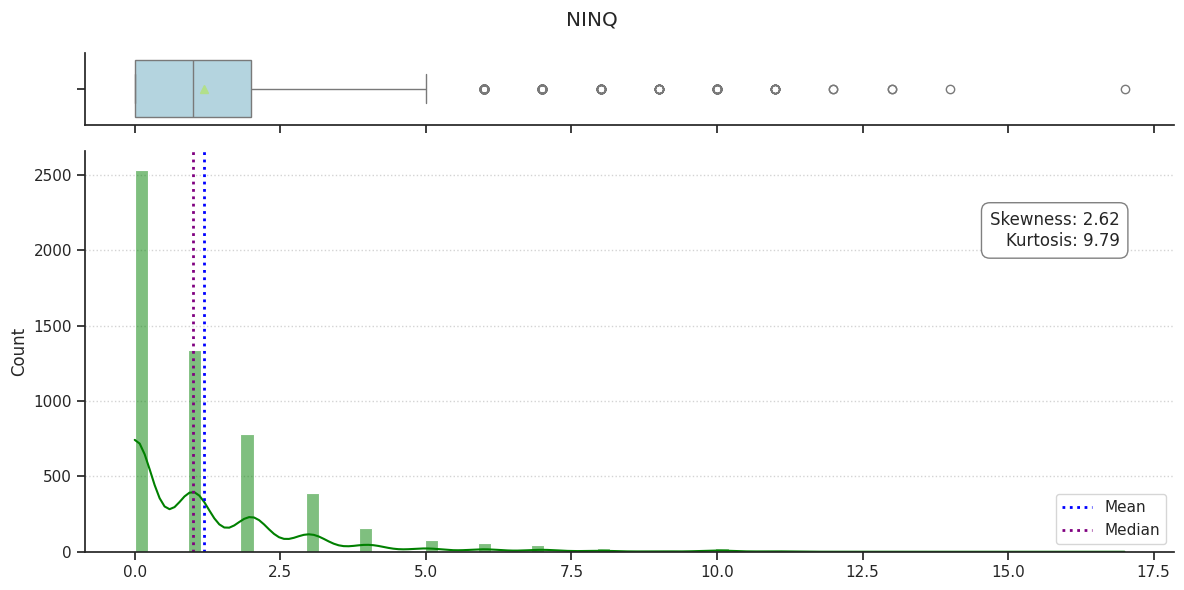

In [129]:
dist_plot(df, 'NINQ')

In [130]:
df['NINQ'].value_counts()

NINQ
0.000     2531
1.000     1339
2.000      780
3.000      392
4.000      156
5.000       75
6.000       56
7.000       44
10.000      28
8.000       22
9.000       11
11.000      10
12.000       2
13.000       2
14.000       1
17.000       1
Name: count, dtype: int64

🔎 **Observations:** The variable NINQ represents the number of recent credit inquiries. For example, if an individual applied for credit three times in the last six months (including credit card applications, loan applications, etc.), the "NINQ" value for that person would be 3. It counts the instances of recent inquiries made by the individual, providing insight into their recent credit-seeking behavior.

Considering that only 8% of the data is missing for this feature, majority of the applicants either none or 1 credit inquiries. This might be a good indicator for the target variable and it's worth to check the relation in the bivariate analysis section.

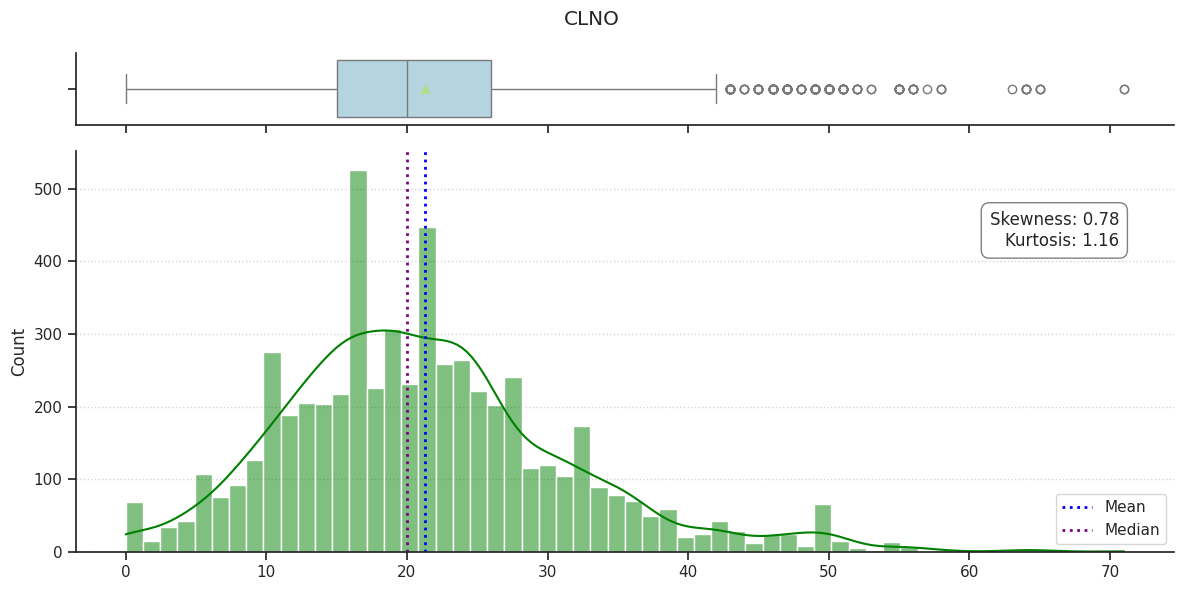

In [131]:
dist_plot(df, 'CLNO')

🔎 **Observations:** The variable "CLNO" represents the number of existing credit lines. For instance, if an individual currently has two credit cards, an auto loan, and a mortgage, the "CLNO" value for that person would be 4. It counts the total number of distinct credit lines that the individual currently possesses, providing a measure of their credit diversification and the overall extent of their existing credit relationships. The feature has almost a normal distribution with some outliers. The majority of the customers have between 10 to 30 existing credit lines.

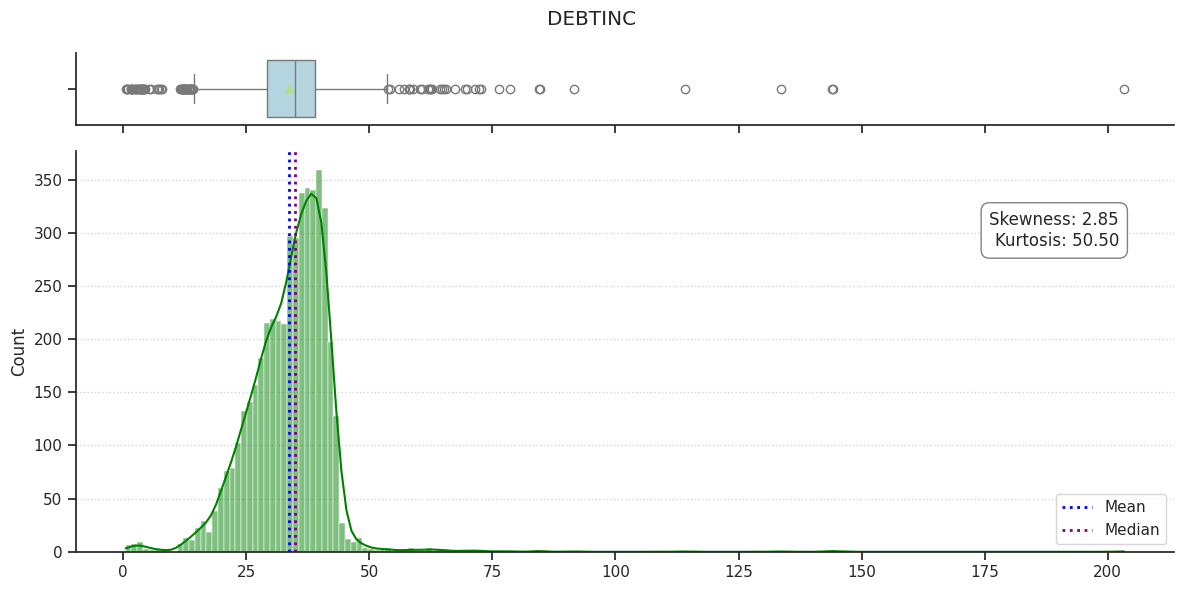

In [132]:
dist_plot(df, 'DEBTINC')

🔎 **Observations:** Debt-to-income ratio is a very strong indicator for ability to manage the monthly payments to repay the money you plan to borrow. So it might have a strong relation with the target value which is worth to review in the bivarite section.

The distribution of the values are a bit right skewed and it seems like there a few outliers. We should treat them as outliers as it's not possible to have more debt than you earn in ideal scenario.

#### Summary

Below columns should be categorical features
- DEROG
- DELINQ
- NINQ

### 4.1.2. Categorical Columns

In [133]:
# Function to create labeled barplots for categorical features
def plot_counts(data, feature, perc = False, n = None, hue = None):
  """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - feature <string>: Name of categorical column in dataframe to be visualized.
    - perc <bool>: whether to display percentages instead of count (default is False)
    - n <int>: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])            # How many number of rows are there in the feature?
  num_unique = data[feature].nunique()  # How many unique number of category are there in the feature?

  # Set the size of the figure according to the number of categories to be displayed
  if n is None:
    plt.figure(figsize = (num_unique+1, 5))
  else:
    plt.figure(figsize = (n+1, 5))

  # Set the style of the ticks on x axis
  plt.xticks(rotation=90, fontsize=12)

  # Plot the counts for each category
  ax = sb.countplot(
      data=data,
      x = feature,
      palette = 'Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
      hue = hue
  )

  # Add grid
  ax.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)

  # Display the percentage of each category on top of the bar
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height() / total  # Display percentage of each class of the category
      )
    else:
      label = p.get_height() # Display count of each level of the category

    x = p.get_x() + p.get_width() / 2 # Width of the plot
    y = p.get_height() # Height of the plot

    rotation = 0
    if hue is not None:
      rotation = 30  # Rotate annotations by 30 degrees if hue is not None


    ax.annotate(
        label,
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
  plt.show()

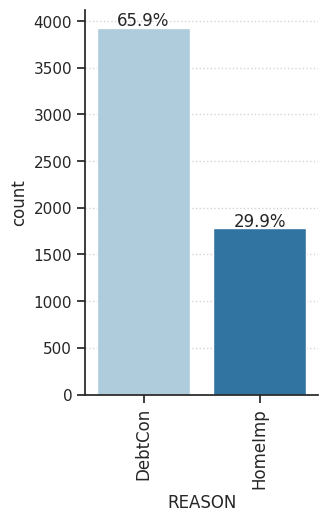

In [134]:
plot_counts(df, 'REASON', perc=True)

🔎 **Observations:** There are 2 reasons why people apply for a loan.
- DebtCon = debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts.
- HomeImp = home improvement.

Considering 4% of the records are missing, majority of the reasons belongs to debt consolidation category.

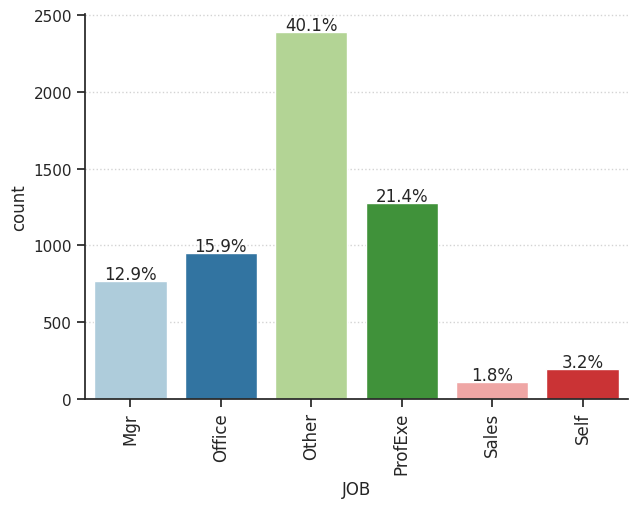

In [135]:
plot_counts(df, 'JOB', perc=True)

🔎 **Observations:** We have 6 different types of jobs in this feature. 40% of them marked as Other which has the highest proportion among the others. It's hard to make a deduction from this statement which requires further input on what Other means, how many different types of Others there are in Other category etc. The Sales employees have the least proportion among the others. Either Sales people don't prefer to work with this bank or they don't tend to buy properties. Maybe they don't see it as an investment instrument.

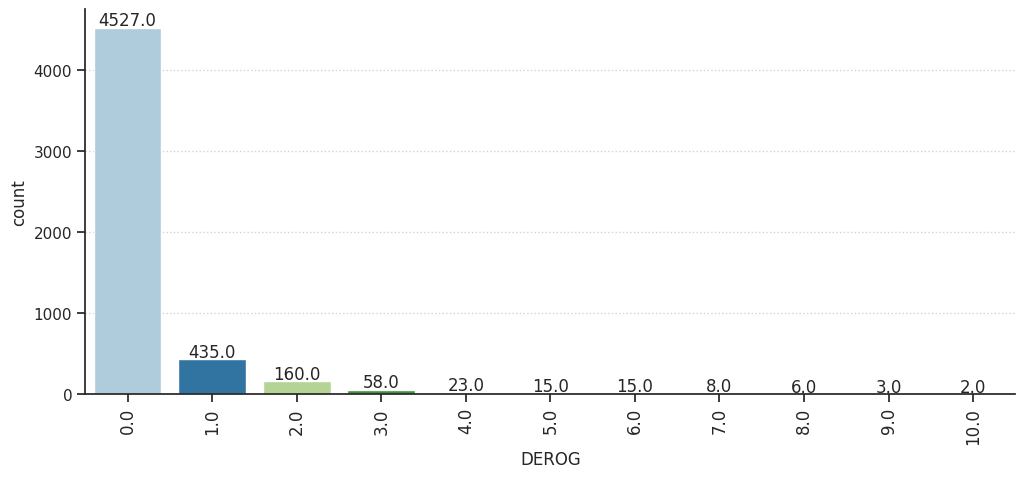

In [136]:
plot_counts(df, 'DEROG')

🔎 **Observations:** The majority of the applicants have less than 1 derogatory items. Based on the relation to the result of the loan we can group them as 0 and others.

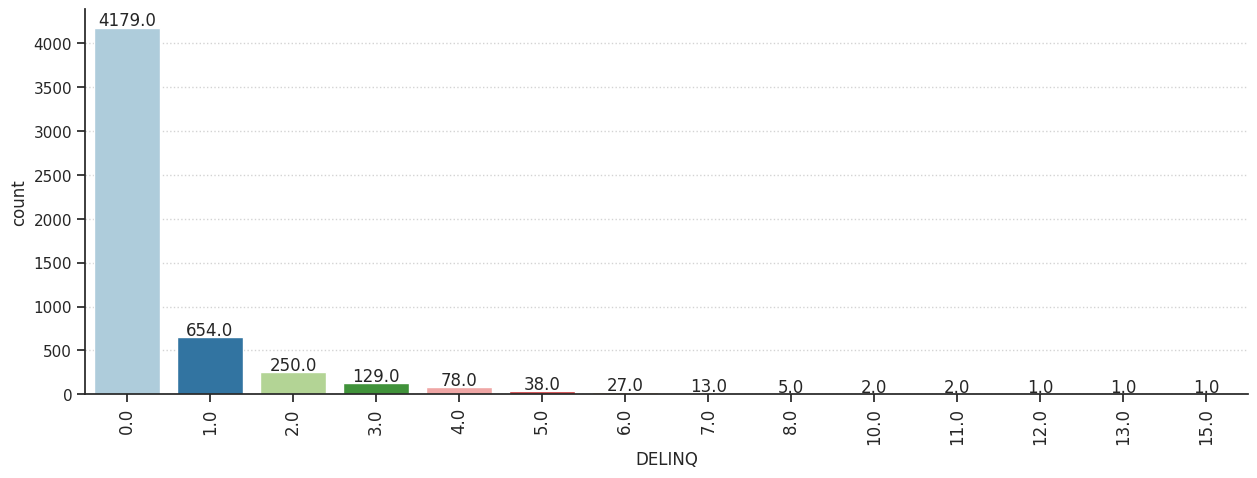

In [137]:
plot_counts(df, 'DELINQ')

🔎 **Observations:** It's the same as above delinquency lines

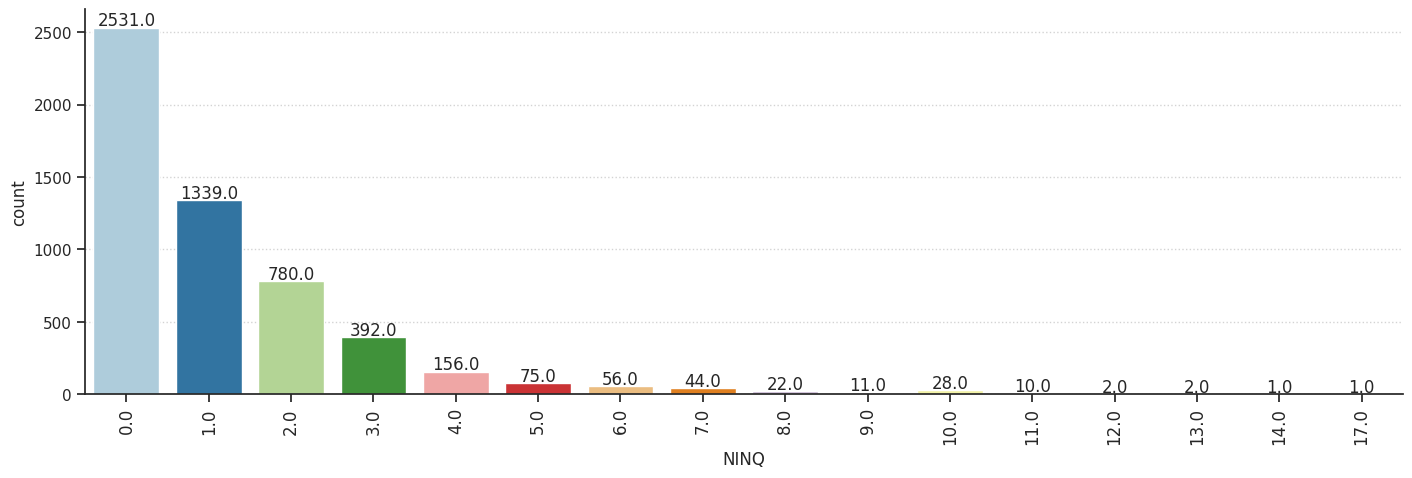

In [138]:
plot_counts(df, 'NINQ')

🔎 **Observations:** It's the same for number of recent credit inquiries.

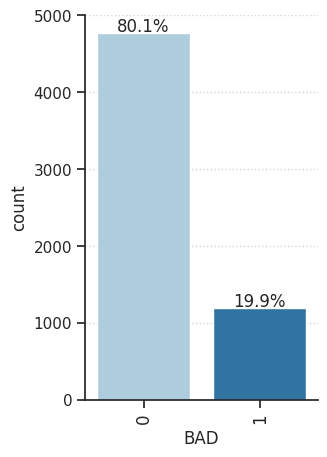

In [139]:
# Let's check distribution of the target variable.
# Even though it is int64 datatype, we can use count plot as if it's an object column
plot_counts(df, 'BAD', perc=True)

🔎 **Observations:** We can easily notice that the data is highly imbalanced. Almost 20% of the values for this feature is 1 which means that client defaulted on loan and 80% of them are 0s which means loan repaid. I'm not sure if it's a good KPI for a bank but it's a good indicator for us that we **should not use accuracy** as a performance metric while evaluating the ML models.

$$Recall = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

$$Precision = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

If clients who are genuinely defaulting on their loans are mistakenly classified as non-defaulters (False Negatives), there is a risk of substantial losses for the bank if these clients indeed default in the future. Maximizing Recall can mitigate this risk by minimizing the number of false negatives.

Conversely, when predicting clients who may default, identifying some as non-defaulters (False Positives) does not result in direct losses compared to the losses incurred from actual loan defaults. Consequently, prioritizing the **maximization of Recall** over Precision and Accuracy is crucial for risk mitigation.

## 4.2. Bivariate Analysis

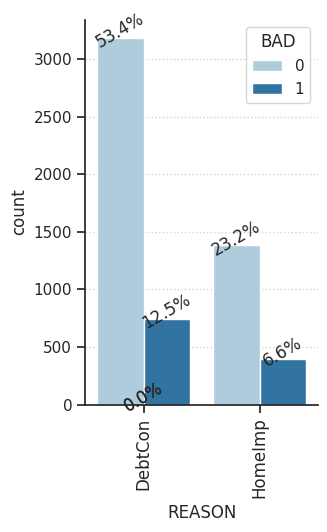

In [140]:
plot_counts(df, 'REASON', perc=True, hue='BAD')

🔎 **Observations:** As you see in the univariate analysis section, the number of application for debt consoludation is almost the double of the home improvements. We can see from the above plot that it's hard to deduct a direct correlation between the reason for a loan and if it's paid or not. We can only say that 53% out of 65% of DebtCon reason are repaid and 23% out of 30% of HomImp are paid.

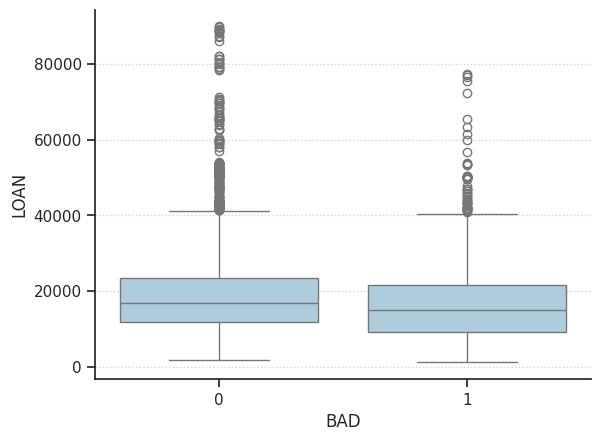

In [184]:
sb.boxplot(data=df, x='BAD', y='LOAN')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's hard find out a correlation between the target variable and this feature by just looking at this plot. It seems that the range of the loan are similar for both default and paid loan records with almost the same median value.

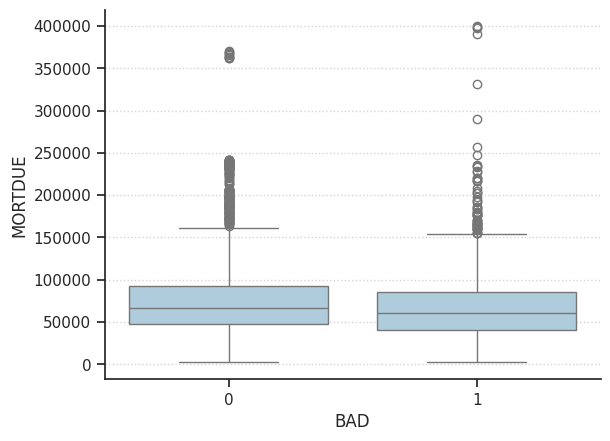

In [185]:
sb.boxplot(data=df, x='BAD', y='MORTDUE')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's the same as LOAN with a couple of outliers on the defult loans. We have a couple of sample with high amount of mortgage due default loan however, it doesn't have enough proof to mention a correlation.

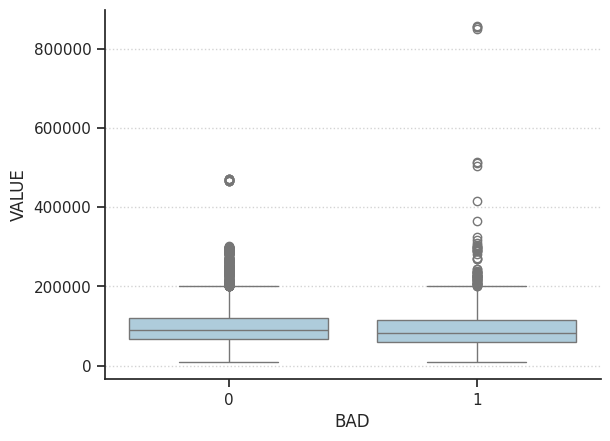

In [186]:
sb.boxplot(data=df, x='BAD', y='VALUE')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's the same as MORTDUE value with a couple of outliers on the defult loans. We have a couple of sample with houses with a high value default loan however, it doesn't have enough proof to mention a correlation.

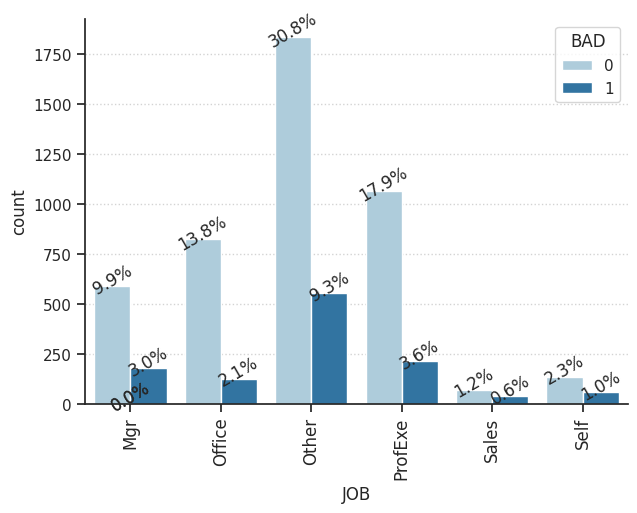

In [144]:
plot_counts(df, 'JOB', perc=True, hue='BAD')

🔎 **Observations:** As per the plot above, ProfExe, Office and Mgr employess are more like to repay their debt than Sales and Self employees. Other which must be the combination of many different jobs, are in between.

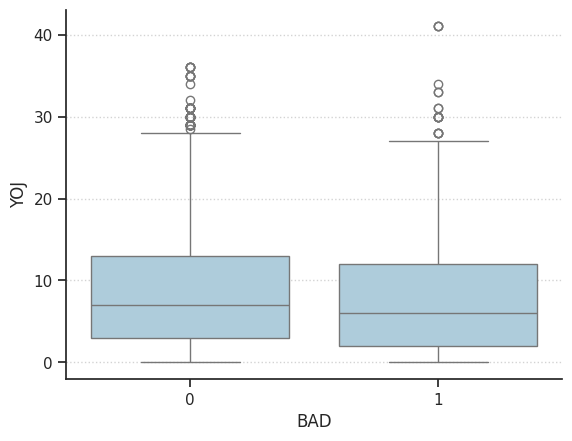

In [187]:
sb.boxplot(data=df, x='BAD', y='YOJ')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's hard to notice any relation between the target variable and with this feature.

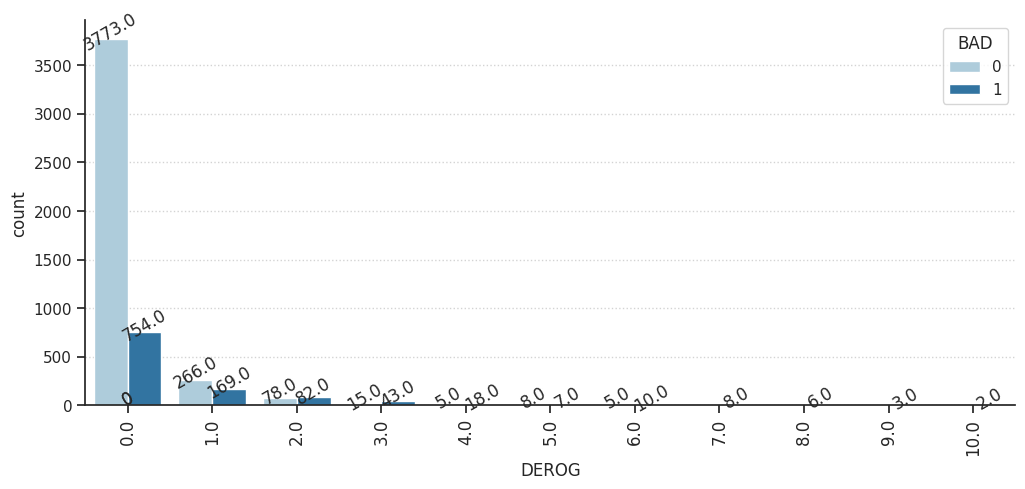

In [146]:
plot_counts(df, 'DEROG', hue='BAD')

🔎 **Observations:** Let's zoom in for the applications that has more than 1 derogs to have a better understandin on the relation.

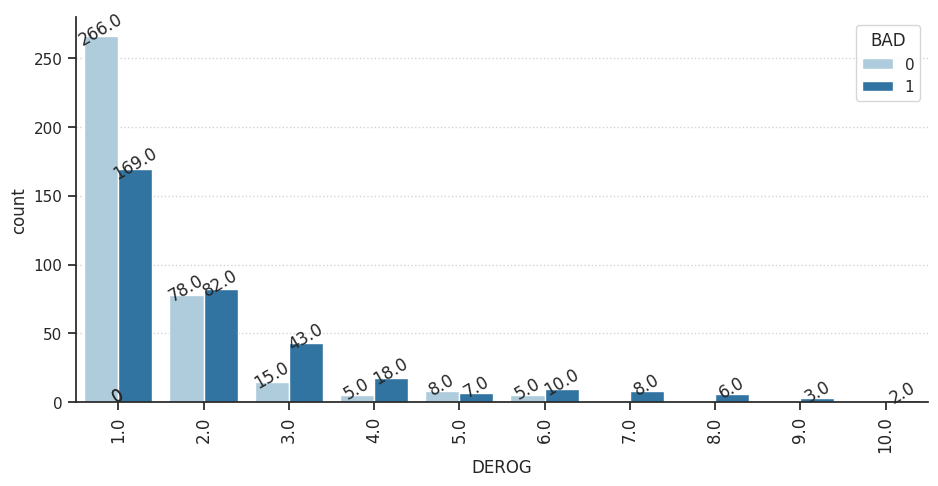

In [147]:
# Let's check the records with more than or eaqal to 1 DEROG
plot_counts(df[df['DEROG']>=1], 'DEROG', hue='BAD')

In [148]:
df[df['DEROG'] >= 7]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
493,1,7000,53194.000,81150.000,HomeImp,ProfExe,14.000,7.000,0.000,183.633,2.000,28.000,NaN
495,1,7000,138841.000,160000.000,DebtCon,Mgr,11.000,8.000,0.000,86.200,2.000,36.000,NaN
1192,1,10000,52410.000,54500.000,NaN,Mgr,1.000,9.000,4.000,132.900,4.000,29.000,NaN
2045,1,13000,7200.000,24869.000,HomeImp,Other,0.700,9.000,1.000,193.800,0.000,9.000,NaN
2202,1,13600,30200.000,43600.000,HomeImp,Other,0.000,8.000,1.000,230.300,0.000,18.000,NaN
2410,1,14500,38986.000,49970.000,HomeImp,Other,1.000,8.000,1.000,220.917,0.000,17.000,47.915
2588,1,15000,33000.000,NaN,NaN,NaN,0.900,7.000,5.000,144.867,0.000,20.000,NaN
2595,1,15000,40000.000,58000.000,NaN,ProfExe,4.000,7.000,0.000,268.833,3.000,26.000,NaN
2599,1,15000,16400.000,205950.000,DebtCon,Mgr,10.000,8.000,3.000,135.933,11.000,42.000,NaN
2600,1,15000,55300.000,81000.000,DebtCon,Other,5.300,8.000,0.000,259.733,4.000,30.000,NaN


🔎 **Observations:** We can see on the above plot that it's hard to tell if someone is going to default the loan when the applicant has no derogatory reports. In the dataset, almost 13% of the applicants without any derogatory reports failed to repay the loan. However, when the number of derogatory reports increases, the likelyhood of having a default lona increases too. The more you have derogatory reports in your credit history the more likely to fail to repay the loan. We can safely say that there is a correlation between the target variable and this feature.

We can consoludate the values as 0, 1, and more than 1 to limit the number of categories which will decrease the number of features after `OneHotEncoding`.

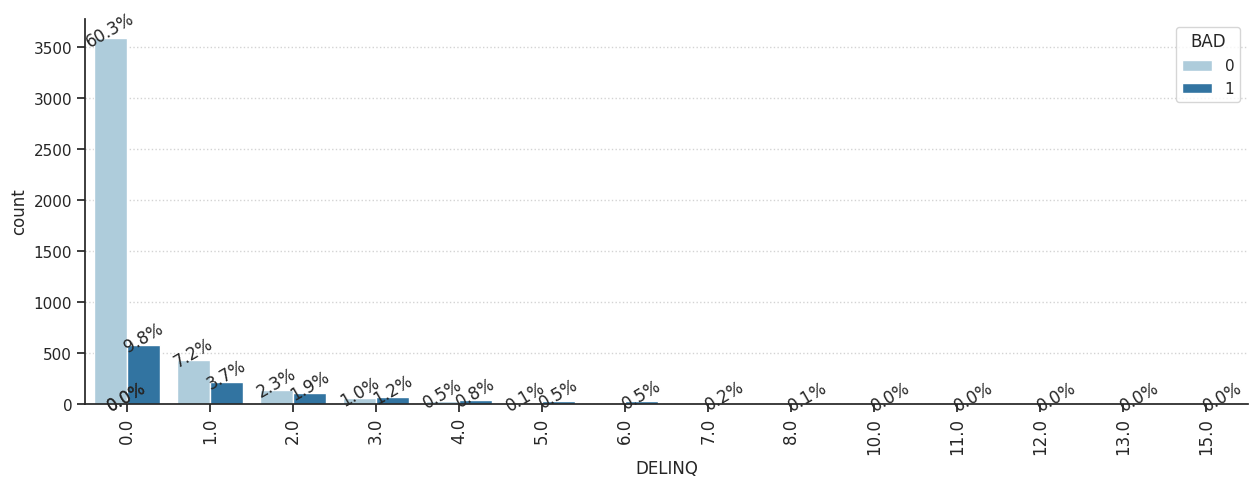

In [149]:
plot_counts(df, 'DELINQ', perc=True, hue='BAD')

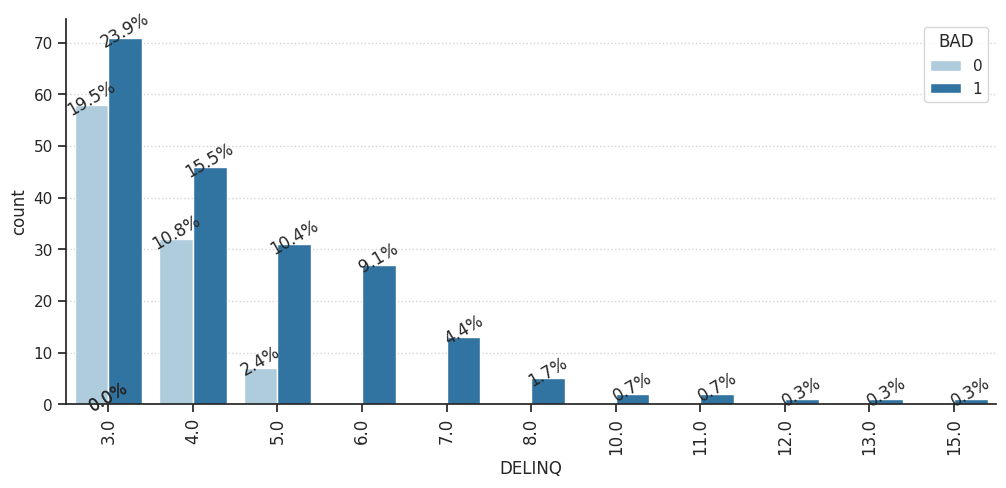

In [150]:
# lets' put a limit on the number DELINQ to have a better visual
plot_counts(df[df['DELINQ']>2], 'DELINQ', perc=True, hue='BAD')

🔎 **Observations:** It's the same as DEROG feature. If a barrower has high number of delinquent credit lines, the cance of falling into default loan increases to. As per the plot above, 70% of the barrowers has 0 DELINQ record yet, 10% them had failed to repay the debt which is a low ratio. When we check the same for the barrowers with 1 or more, the ratio increases. The number of barrowers who failed to pay the debt is even higher than the number of barrows who repaid the loan for the DELINQ number 3 and more. We can safely say that there is a correlation between the target variable and this feature.

We can consoludate the values which are equal to and more than 6 to limit the number of categories which will decrease the number of features after `OneHotEncoding`.

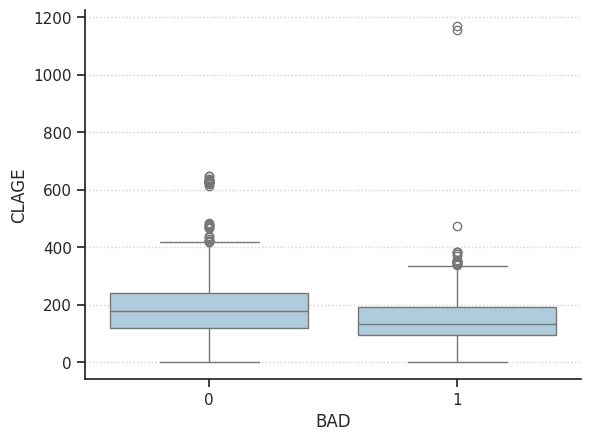

In [188]:
sb.boxplot(data=df, x='BAD', y='CLAGE')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's hard to notice any relation between the target variable and with this feature.

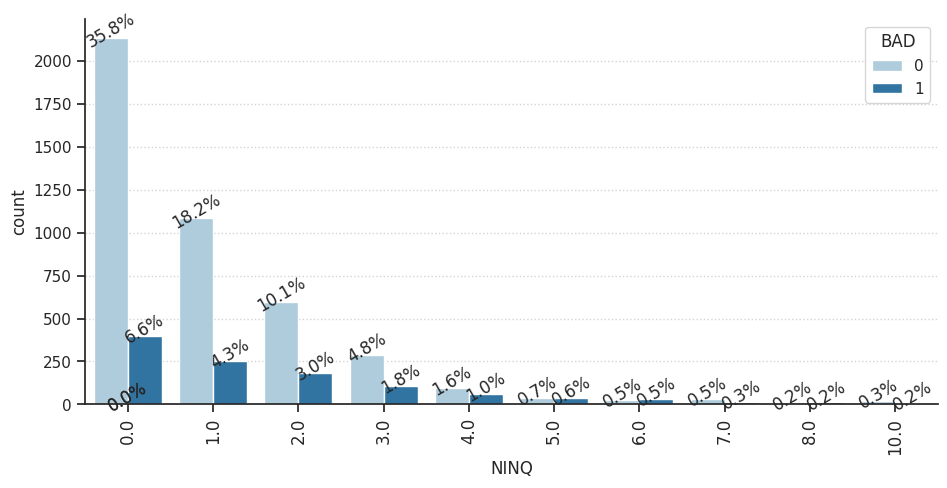

In [152]:
plot_counts(df, 'NINQ', perc=True, hue='BAD', n=10)

🔎 **Observations:** It's hard to notice any relation between the target variable and with number of recent credit inquiries feature.

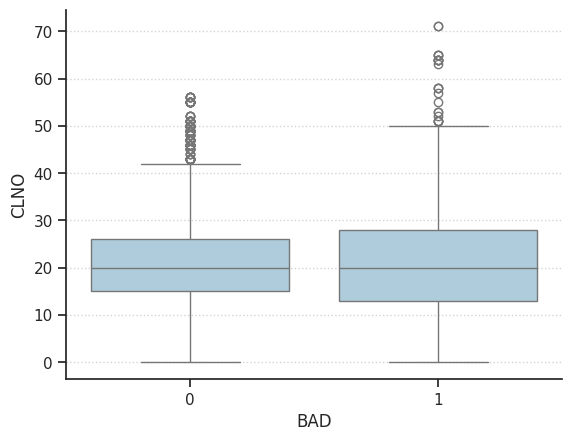

In [189]:
sb.boxplot(data=df, x='BAD', y='CLNO')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observations:** It's hard to notice any relation between the target variable and with this feature however, it's easy to notice that the borrowers with number of existing credit lines higher than 60 had defulted their loan.

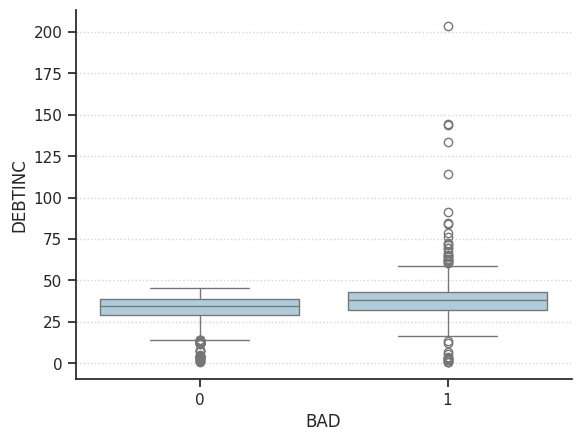

In [190]:
sb.boxplot(data=df, x='BAD', y='DEBTINC')
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

🔎 **Observsations:** If a barrowers debt-to-income ratio is higher than 100, we can say that the bank will have a default loan.

## 4.3. Multivariate Analysis

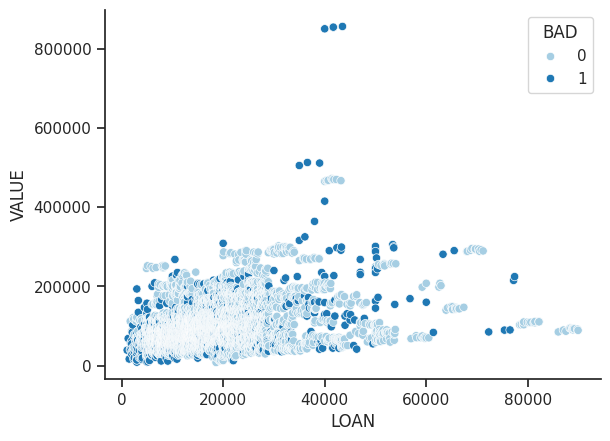

In [155]:
sb.scatterplot(data=df, x='LOAN', y='VALUE', hue='BAD')
plt.show()

🔎 **Observations:** There is no direct correlation between the value of the house and the amount of the loan and the result of the loan that can be seen by looking at the above plot.

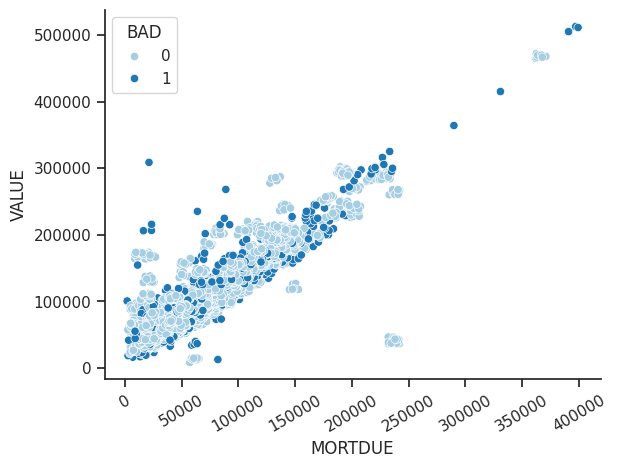

In [156]:
sb.scatterplot(df, x='MORTDUE', y='VALUE', hue='BAD')
plt.xticks(rotation=30)
plt.show()

🔎 **Observations:** Even though we can see a positive correlation between the MORTDUE and VALUE with a couple of outliers, we can't see any correlation with the result of the loan.

ℹ️ Due to the limited number of values DEROG, DELINQ, CLAGE, NINQ and BAD columns should be threaded as objects.

In [157]:
df[['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'BAD']] = df[['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'BAD']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   object 
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   object 
 8   DELINQ   5380 non-null   object 
 9   CLAGE    5652 non-null   object 
 10  NINQ     5450 non-null   object 
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 605.4+ KB


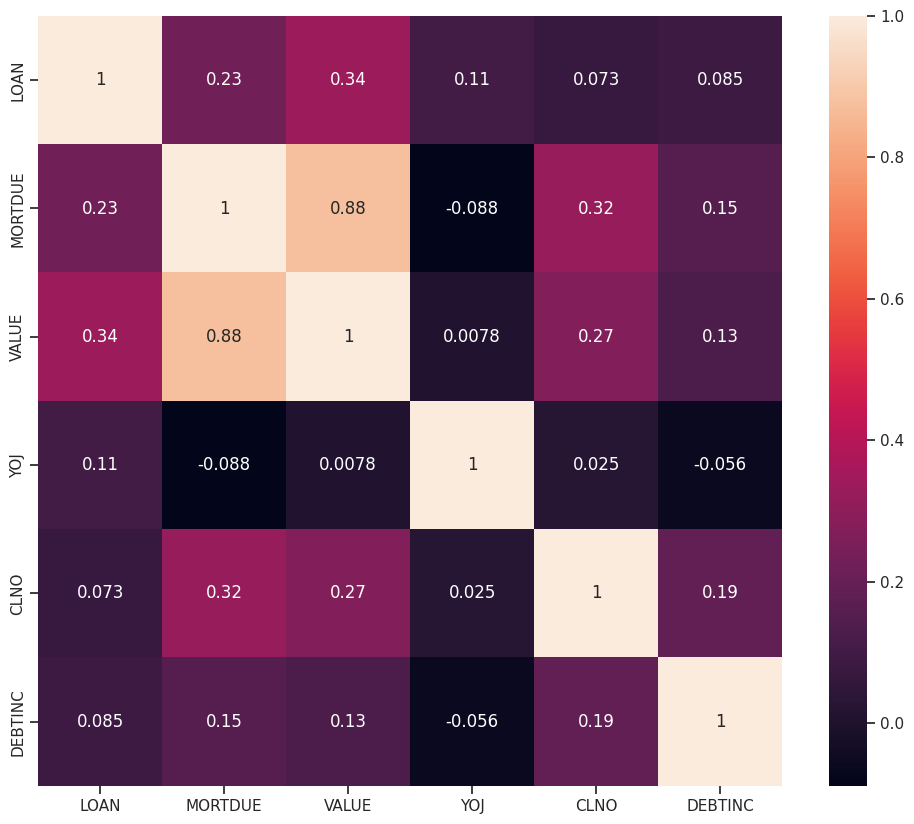

In [158]:
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

🔎 **Observations:**
- MORTDUE and the VALUE columns has the highest postive correlation between 2 features.
- LOAN amount and VALUE also has decent positive correlation.
- We can't tell there is a strong negative correlation between any features.

# 📝 5. Important Insights from EDA

What are the the most important observations and insights from the data based on the EDA performed?

- Many columns has many missing values and outliers to be handled.
- There is no direct correlation between the target and the loan amount.
- It's obvious that the more the number of recent credit inquiries of a customer, the less likely he/she will pay the debt.
- It's the same for derogatory marks in an applicants history.


# 🧹 6. Data Preparation

## 6.1. Handling Missing Values
As mentioned the Data Overview section the feature with the highest number of missing values is DEBTINC. It has a strong correlation with the target so it's better to impute as much information as possible with this one. It's better to create 2 different version of the dataset as this point.
1. The dataset with all the null values are dropped.
2. The dataset null values are imputed as much as possible. This can have further  variants like:
    
    A. Using KNN imputer

    B. Manual imputing

Then these datasets can be fed to the models and perform the performance of the model.


### 6.1.1 Dropping

In [159]:
df_no_null = df.dropna().reset_index(drop=True)
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   object 
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   object 
 8   DELINQ   3364 non-null   object 
 9   CLAGE    3364 non-null   object 
 10  NINQ     3364 non-null   object 
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 341.8+ KB


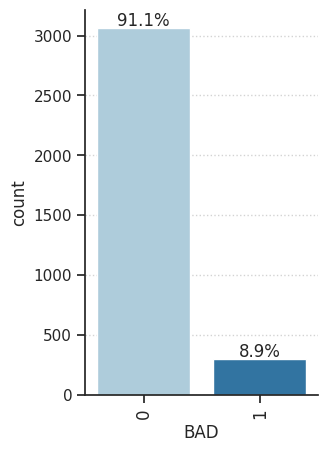

In [160]:
plot_counts(df_no_null, 'BAD', perc=True)

🔎 **Observations:** As you can be see in the previous section the ratio of the defaulted loans was 20% in the original dataset. The dataset became more imbalanced after dropping all null values. This might have big impact on the generalization performance of the algorithms.

However, since the 21% of the values of DEBTINC is missing, maybe first we should drop this column even though it has a strong relation with the target, then check the balance of the dataset.

In [161]:
df_no_debtinc_no_null = df.drop('DEBTINC', axis=1).dropna()
df_no_debtinc_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4247 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4247 non-null   object 
 1   LOAN     4247 non-null   int64  
 2   MORTDUE  4247 non-null   float64
 3   VALUE    4247 non-null   float64
 4   REASON   4247 non-null   object 
 5   JOB      4247 non-null   object 
 6   YOJ      4247 non-null   float64
 7   DEROG    4247 non-null   object 
 8   DELINQ   4247 non-null   object 
 9   CLAGE    4247 non-null   object 
 10  NINQ     4247 non-null   object 
 11  CLNO     4247 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 431.3+ KB


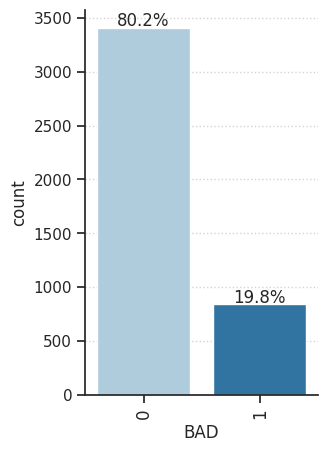

In [162]:
plot_counts(df_no_debtinc_no_null, 'BAD', perc=True)

In [163]:
df[df['DEBTINC'].notnull()].head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.000,40320.000,HomeImp,Other,9.000,0.000,0.000,101.466,1.000,8.000,37.114
7,1,1800,28502.000,43034.000,HomeImp,Other,11.000,0.000,0.000,88.766,0.000,8.000,36.885
17,1,2200,23030.000,NaN,NaN,NaN,19.000,NaN,NaN,NaN,NaN,NaN,3.711
19,0,2300,102370.000,120953.000,HomeImp,Office,2.000,0.000,0.000,90.993,0.000,13.000,31.589
25,1,2400,34863.000,47471.000,HomeImp,Mgr,12.000,0.000,0.000,70.491,1.000,21.000,38.264


🔎 **Observations:** As you can see we could manage to preserve the balance and had more datapoints with this approach. However, considering the relation, we might lost a strong predictor for the model. Let's keep both and check the model performance for both datasets.

In [164]:
df_no_null.to_csv('./Data/Processed/hmeq_no_null.csv', index=False)
df_no_debtinc_no_null.to_csv('./Data/Processed/hmeq_no_debtinc_no_null.csv', index=False)

### 6.1.2 Imputing

In [165]:
# Import LabelEncoder to encode string values in the object columns so KNN Imputer can work
from sklearn.preprocessing import LabelEncoder

In [166]:
df['REASON'].value_counts()

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

In [167]:
label_encoder = LabelEncoder()

# Replace NaN with a placeholder value (e.g., 'Unknown')
df['REASON'].fillna('Unknown', inplace=True)
df['REASON'] = label_encoder.fit_transform(df['REASON'])
# To get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
# Revert placeholder values back to NaN
df['REASON'] = np.where(df['REASON'] == label_encoder.transform(['Unknown'])[0], np.nan, df['REASON'])

{'DebtCon': 0, 'HomeImp': 1, 'Unknown': 2}


In [168]:
# Do the same for JOB column
df['JOB'].fillna('Unknown', inplace=True)
df['JOB'] = label_encoder.fit_transform(df['JOB'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
df['JOB'] = np.where(df['JOB'] == label_encoder.transform(['Unknown'])[0], np.nan, df['JOB'])

{'Mgr': 0, 'Office': 1, 'Other': 2, 'ProfExe': 3, 'Sales': 4, 'Self': 5, 'Unknown': 6}


In [169]:
# Import KNN Imputer library
from sklearn.impute import KNNImputer

In [170]:
# Impute the missing values using 5 number of neighbors
imputer = KNNImputer(n_neighbors=5)

x = df.drop('BAD', axis=1)
imputer.fit(x)
x_imputed = imputer.transform(x)
# Check if all the null values are imputed
print(sum(np.isnan(x_imputed).flatten()))

0


In [171]:
# Convert the imputed numpy array into DataFrame object
df_imputed = pd.DataFrame(x_imputed, columns=df.drop('BAD', axis=1).columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   float64
 4   JOB      5960 non-null   float64
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(12)
memory usage: 558.9 KB


In [172]:
# Since we performed imputation on features, we need to add target values to the imputed dataframe
df_imputed = pd.concat([df_imputed, df['BAD']], axis=1)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   float64
 4   JOB      5960 non-null   float64
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
 12  BAD      5960 non-null   object 
dtypes: float64(12), object(1)
memory usage: 605.4+ KB


In [173]:
df_imputed['REASON'].value_counts()

REASON
0.000    3966
1.000    1805
0.600      61
0.400      53
0.800      41
0.200      34
Name: count, dtype: int64

✍🏼 **Note:** As you can see on the above table, kNN imputer filled the missing values in float format. That's why to protect the existing data types, we need to convert these features into integers.

In [174]:
obj_columns = ['REASON', 'JOB', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'BAD']
df_imputed[obj_columns] = df_imputed[obj_columns].astype('int64')
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   int64  
 4   JOB      5960 non-null   int64  
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   int64  
 7   DELINQ   5960 non-null   int64  
 8   CLAGE    5960 non-null   int64  
 9   NINQ     5960 non-null   int64  
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
 12  BAD      5960 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 605.4 KB


In [175]:
df_imputed['REASON'].value_counts()

REASON
0    4155
1    1805
Name: count, dtype: int64

In [176]:
df_imputed['DEBTINC'].value_counts()

DEBTINC
27.123    13
26.223     8
26.223     5
27.028     5
24.356     4
          ..
34.192     1
31.459     1
35.558     1
39.678     1
34.572     1
Name: count, Length: 5897, dtype: int64

In [177]:
# Extract it to a .csv file
df_imputed.to_csv('./Data/Processed/hmeq_knn_imputed.csv', index=False)

## 6.2. Handling Outliers

In [178]:
# Create lists numeric columns
num_cols = []

for column in df_no_debtinc_no_null.columns:
    if pd.api.types.is_numeric_dtype(df_no_debtinc_no_null[column]):
        num_cols.append(column)

print(f'Numeric columns: {len(num_cols)}', num_cols)

Numeric columns: 5 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLNO']


In [191]:
def plot_outliers(data, columns):
  # number of columns of the subplots
  n_cols = 2
  # set the number of rows with the predefined number of columns
  n_rows = int(np.ceil(len(columns)/n_cols))

  # Create figure
  fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
  # Flatten the axes array for easier indexing
  ax = ax.flatten()

  for i in range(len(columns)):
    sb.boxplot(data=data, x=columns[i],
              color='lightblue', ax=ax[i])
    # Add grid
    ax[i].grid(axis='x', which='major', alpha=0.85, linestyle='dotted', zorder=2)


  # If the number of features is odd, remove the empty subplot
  if len(columns) % 2 != 0:
      fig.delaxes(ax[-1])

  plt.tight_layout()
  plt.show(block=False)

In [ ]:
plot_outliers(df_no_debtinc_no_null, num_cols)

In [181]:
df_no_debtinc_no_null_no_outliers = df_no_debtinc_no_null[(df_no_debtinc_no_null['LOAN'] <= 80000) &
                                                          (df_no_debtinc_no_null['MORTDUE'] <= 350000) &
                                                          (df_no_debtinc_no_null['VALUE'] <= 400000)]
df_no_debtinc_no_null_no_outliers = df_no_debtinc_no_null_no_outliers.reset_index(drop=True)
df_no_debtinc_no_null_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4222 non-null   object 
 1   LOAN     4222 non-null   int64  
 2   MORTDUE  4222 non-null   float64
 3   VALUE    4222 non-null   float64
 4   REASON   4222 non-null   object 
 5   JOB      4222 non-null   object 
 6   YOJ      4222 non-null   float64
 7   DEROG    4222 non-null   object 
 8   DELINQ   4222 non-null   object 
 9   CLAGE    4222 non-null   object 
 10  NINQ     4222 non-null   object 
 11  CLNO     4222 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 395.9+ KB


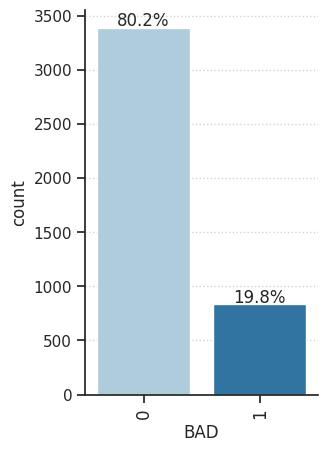

In [182]:
plot_counts(df_no_debtinc_no_null_no_outliers, 'BAD', perc=True)

In [183]:
# Extract it to a .csv file
df_no_debtinc_no_null_no_outliers.to_csv('./Data/Processed/hmeq_no_debtinc_no_null_no_outliers.csv', index=False)